In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:/Users/siddhika/OneDrive/Desktop/bosotnhousing/Boston.csv")
df.drop(columns=['Unnamed: 0'], axis=0, inplace=True)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BLACK,ISTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
# statistical info
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BLACK,ISTAT,MEDV
count,113.000000,113.000000,113.000000,113.0,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000
mean,0.268422,10.960177,6.911947,0.0,0.477399,6.238920,59.559292,4.871136,4.097345,301.212389,18.889381,383.419115,11.037080,22.166372
std,0.368535,21.954614,3.054616,0.0,0.047294,0.473815,27.690018,1.580238,1.369076,54.455003,1.733512,39.380086,5.505924,5.666279
min,0.006320,0.000000,0.740000,0.0,0.398000,5.399000,2.900000,2.106900,1.000000,216.000000,15.100000,70.800000,1.980000,12.700000
25%,0.053600,0.000000,4.860000,0.0,0.439000,5.927000,36.800000,3.759800,3.000000,270.000000,17.900000,386.960000,6.780000,18.900000
50%,0.117470,0.000000,7.070000,0.0,0.458000,6.142000,61.800000,4.502600,4.000000,305.000000,18.700000,394.460000,9.880000,21.200000
75%,0.211610,12.500000,8.140000,0.0,0.524000,6.442000,85.500000,5.950500,5.000000,311.000000,20.900000,396.900000,13.830000,24.200000
max,1.612820,100.000000,15.040000,0.0,0.547000,8.069000,100.000000,9.222900,8.000000,469.000000,21.100000,396.900000,30.810000,43.800000


In [4]:
# datatype info
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     113 non-null    float64
 1   ZN       113 non-null    float64
 2   INDUS    113 non-null    float64
 3   CHAS     113 non-null    int64  
 4   NOX      113 non-null    float64
 5   RM       113 non-null    float64
 6   AGE      113 non-null    float64
 7   DIS      113 non-null    float64
 8   RAD      113 non-null    int64  
 9   TAX      113 non-null    int64  
 10  PTRATIO  113 non-null    float64
 11  BLACK    113 non-null    float64
 12  ISTAT    113 non-null    float64
 13  MEDV     113 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 12.5 KB


In [5]:
# check for null values
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
BLACK      0
ISTAT      0
MEDV       0
dtype: int64

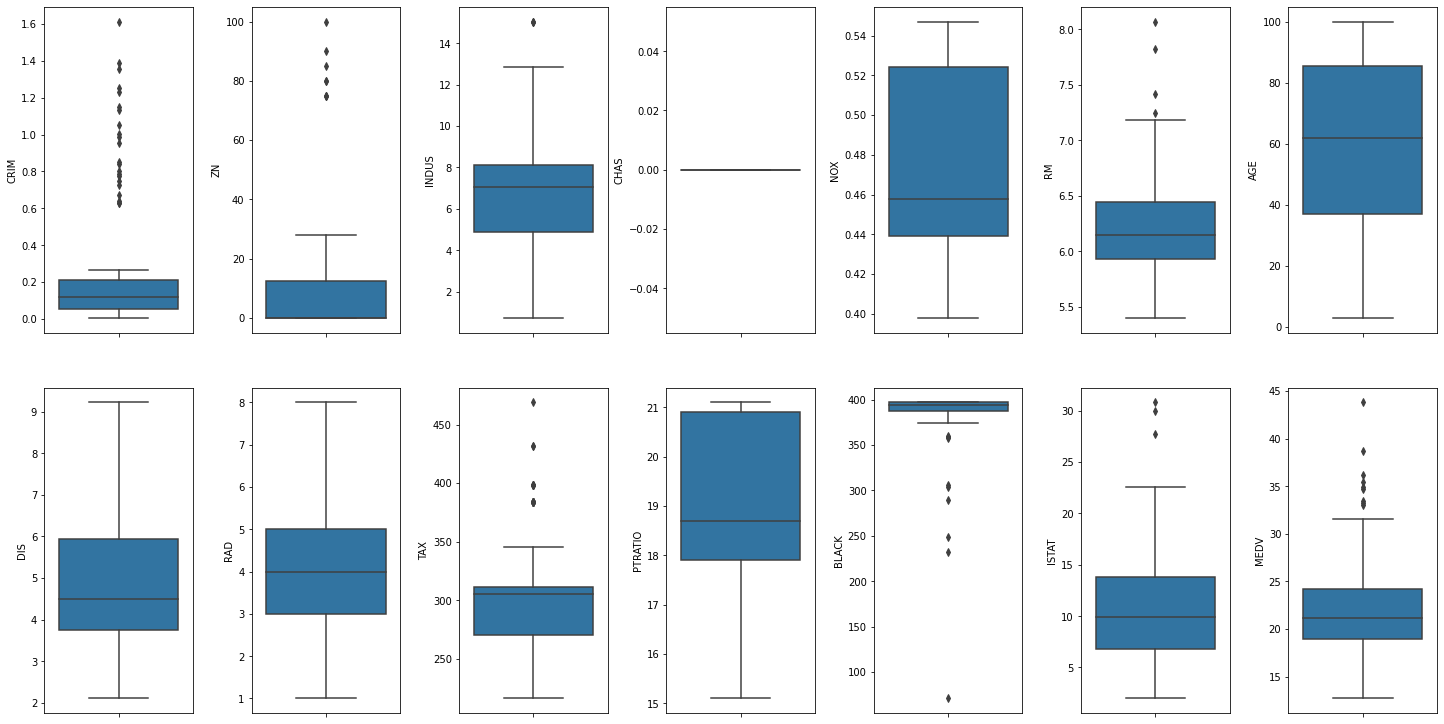

In [6]:
# create box plots
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

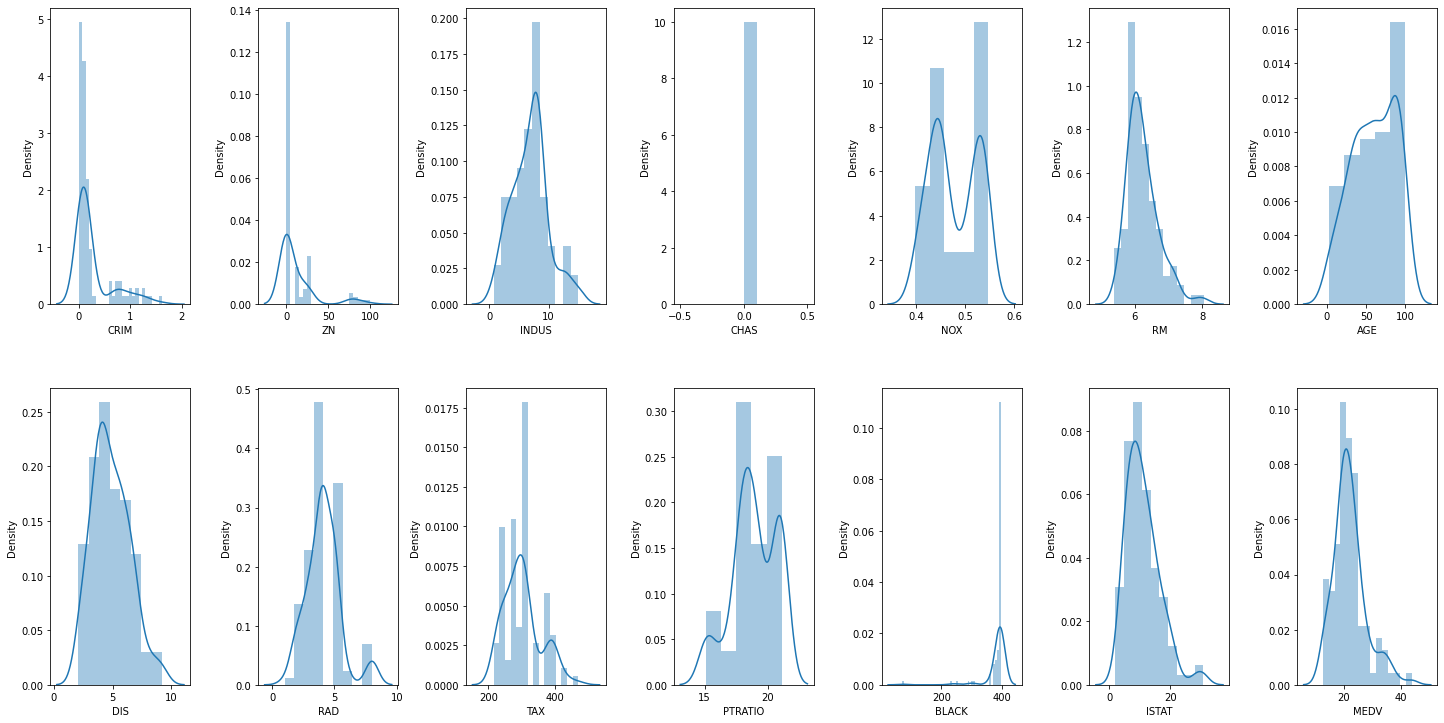

In [7]:
# create dist plot
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.distplot(value, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [9]:
cols = ['CRIM', 'ZN', 'TAX', 'BLACK']
for col in cols:
    # find minimum and maximum of that column
    minimum = min(df[col])
    maximum = max(df[col])
    df[col] = (df[col] - minimum) / (maximum - minimum)

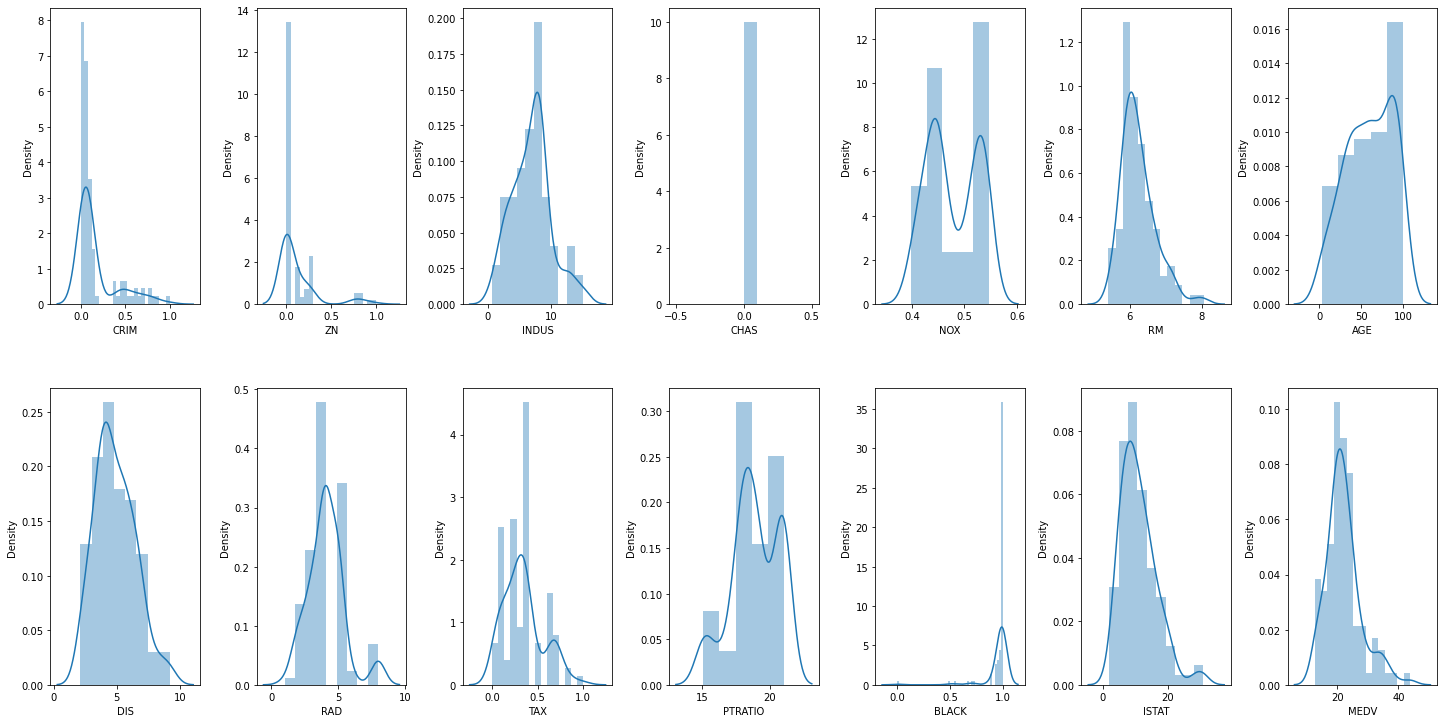

In [10]:
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.distplot(value, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [11]:
# standardization
from sklearn import preprocessing
scalar = preprocessing.StandardScaler()

# fit our data
scaled_cols = scalar.fit_transform(df[cols])
scaled_cols = pd.DataFrame(scaled_cols, columns=cols)
scaled_cols.head()

,CRIM,ZN,TAX,BLACK
0,-0.714369,0.322082,-0.096146,0.343852
1,-0.657160,-0.501443,-1.092207,0.343852
2,-0.657215,-0.501443,-1.092207,0.240040
3,-0.643369,-0.501443,-1.461119,0.285952
4,-0.543396,-0.501443,-1.461119,0.343852


In [12]:
for col in cols:
    df[col] = scaled_cols[col]


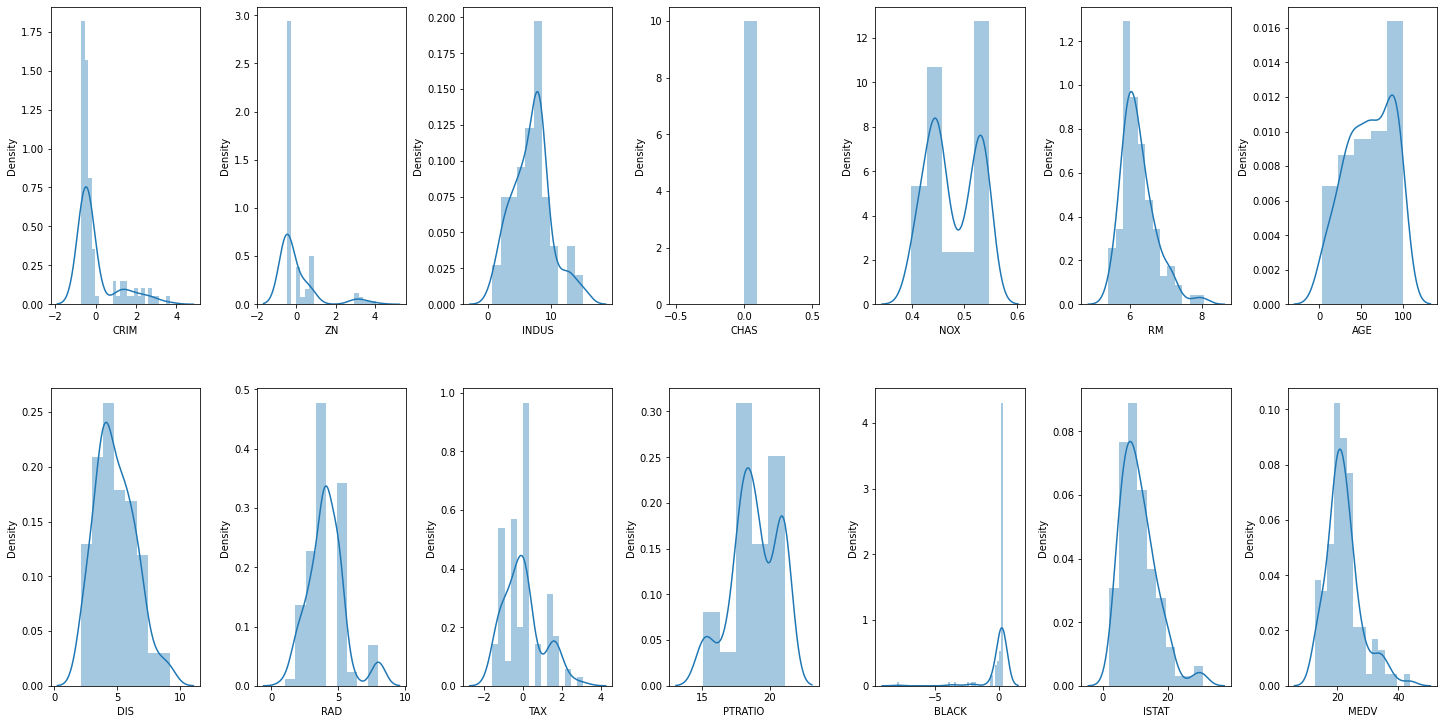

In [13]:
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.distplot(value, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

<AxesSubplot:>

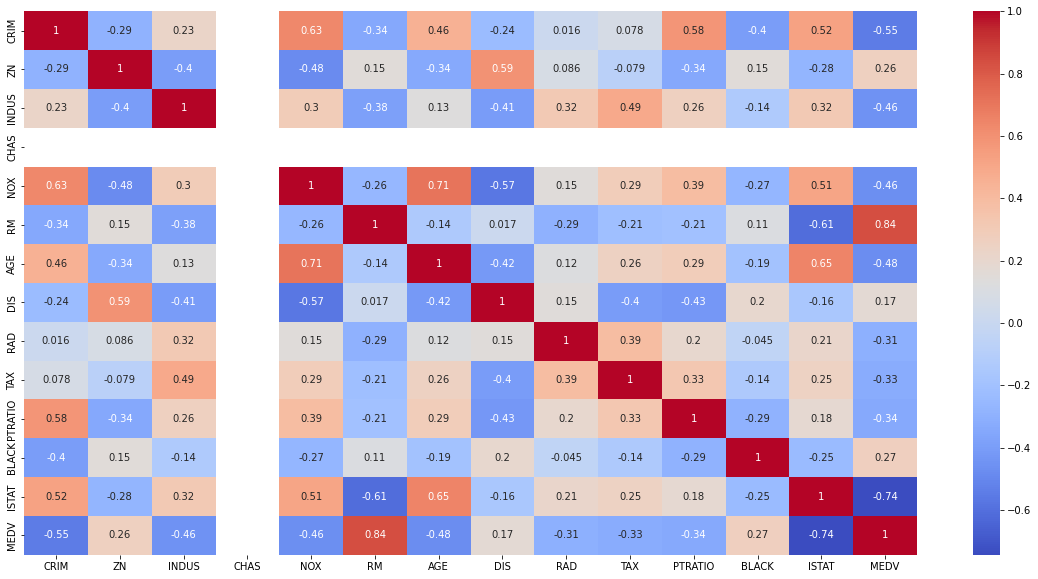

In [14]:
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

<AxesSubplot:xlabel='ISTAT', ylabel='MEDV'>

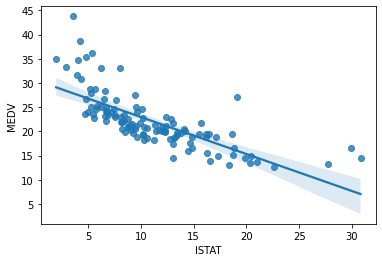

In [18]:
sns.regplot(y=df['MEDV'], x=df['ISTAT'])

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

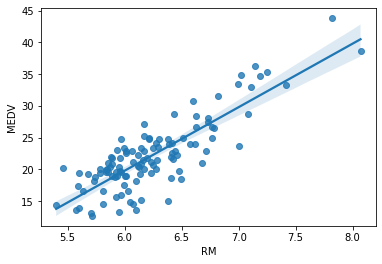

In [19]:
sns.regplot(y=df['MEDV'], x=df['RM'])

In [20]:
X = df.drop(columns=['MEDV', 'RAD'], axis=1)
y = df['MEDV']

In [21]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
def train(model, X, y):
    # train the model
    x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42)
    model.fit(x_train, y_train)
    
    # predict the training set
    pred = model.predict(x_test)
    
    # perform cross-validation
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    
    print("Model Report")
    print("MSE:",mean_squared_error(y_test, pred))
    print('CV Score:', cv_score)

Model Report
MSE: 7.801073666539178
CV Score: 7.124651689305298


<AxesSubplot:title={'center':'Model Coefficients'}>

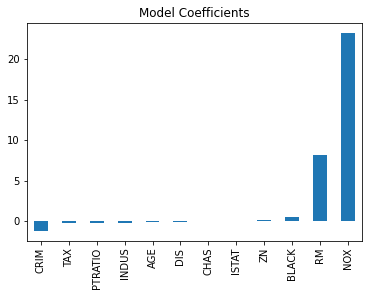

In [22]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(normalize=True)
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title='Model Coefficients')

Model Report
MSE: 11.769999999999998
CV Score: 10.910889328063242


<AxesSubplot:title={'center':'Feature Importance'}>

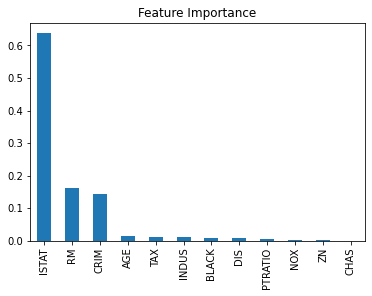

In [23]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title='Feature Importance')

Model Report
MSE: 7.030856655172425
CV Score: 7.487779681818189


<AxesSubplot:title={'center':'Feature Importance'}>

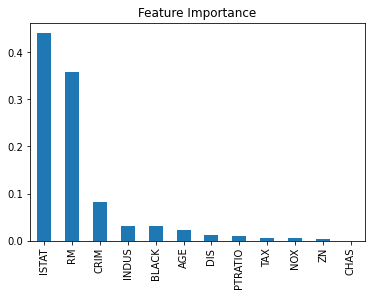

In [24]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title='Feature Importance')

Model Report
MSE: 7.0104430689655235
CV Score: 7.644716099209498


<AxesSubplot:title={'center':'Feature Importance'}>

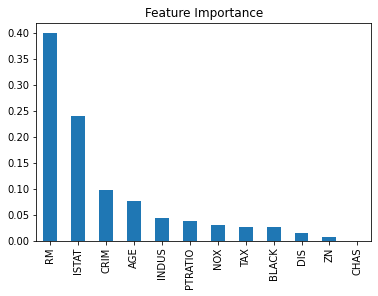

In [25]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title='Feature Importance')

Model Report
MSE: 7.498633713970744
CV Score: 8.39679512837443


<AxesSubplot:title={'center':'Feature Importance'}>

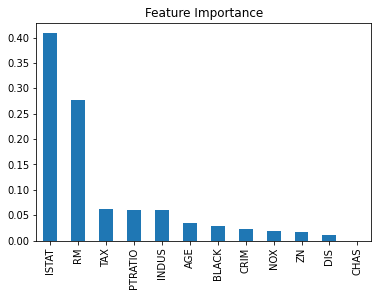

In [28]:
import xgboost as xgb
model = xgb.XGBRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title='Feature Importance')